# Matplotlib - 다양한 플롯

In [4]:
!ls -l sample_data/

total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Oct  8 13:45 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Oct  8 13:45 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Oct  8 13:45 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Oct  8 13:45 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [6]:
# Output 을 쓰레기통(/dev/null)으로 redirection
!cat sample_data/README.md > /dev/null

In [7]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib
# 런타임 > 런타임 다시 시작 클릭

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

### 1. Line Plot

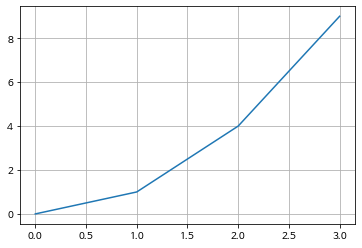

In [2]:
x = [0,1,2,3]
y = [0,1,4,9]
plt.plot(x,y)
plt.grid()
plt.show()

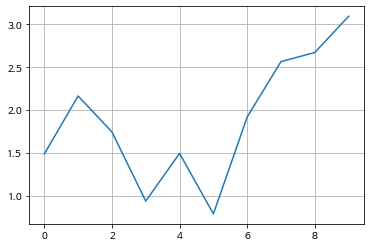

In [3]:
np.random.seed(2021)
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(10))
plt.plot(s)
plt.grid()
plt.show()

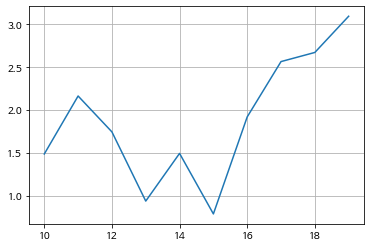

In [4]:
np.random.seed(2021)
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(10,20))
plt.plot(s.index, s.values)
plt.grid()
plt.show()

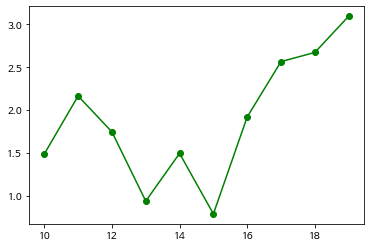

In [6]:
plt.plot(s, color='g', marker='o', linestyle='-');

#### 약어
- color: blue, green, red, cyan, magenta, yellow, black(k), white
- marker: circle(o), 삼각형(^), 역삼각형(v), 사각형(s), 별(*), 플러스(+)
- linestyle: 직선(-), dashed(--), dash-dot(-.), dotted(:)


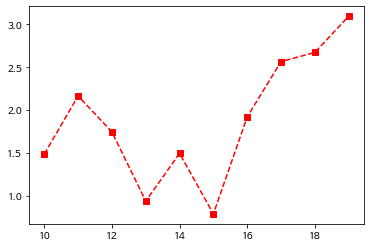

In [9]:
plt.plot(s, 'rs--');

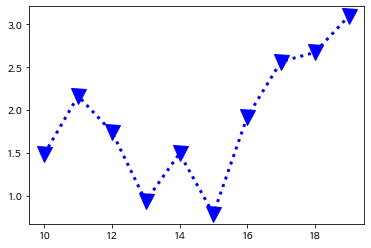

In [11]:
plt.plot(s, 'bv:', ms=15, lw=3);     # markersize, linewidth

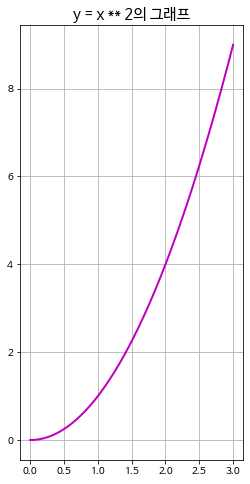

In [15]:
xs = np.arange(0, 3.01, 0.01)
ys = xs * xs
plt.figure(figsize=(4,8))                       # 그림의 크기
plt.plot(xs, ys, 'm-', lw=2)
plt.title('y = x ** 2의 그래프', fontsize=15)   # 제목
plt.grid()
plt.show()

### 2. 산점도 (Scatter Plot)

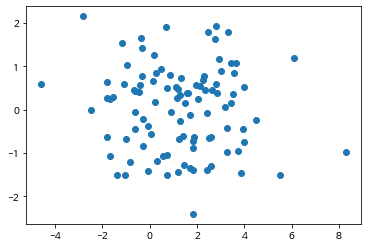

In [16]:
np.random.seed(2021)
plt.scatter(np.random.normal(1, 2, 100), np.random.randn(100))
plt.show()

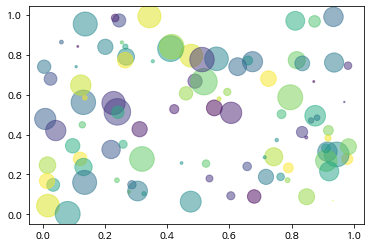

In [21]:
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.rand(100)
area = np.pi * (15 * np.random.rand(100))**2
plt.scatter(x, y, label='Samples', s=area, c=colors, alpha=0.5);

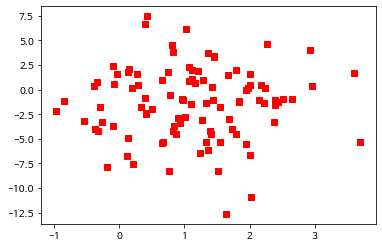

In [22]:
x1 = np.random.normal(1, 1, size=(100, 1))
x2 = np.random.normal(-2, 4, size=(100, 1))
plt.scatter(x1, x2, color='r', marker='s');

### 3. 막대 그래프

In [23]:
s2 = pd.Series(np.random.rand(10), index=list('abcdefghij'))
s2

a    0.576748
b    0.860180
c    0.881201
d    0.840332
e    0.705604
f    0.331692
g    0.573778
h    0.217238
i    0.714953
j    0.931903
dtype: float64

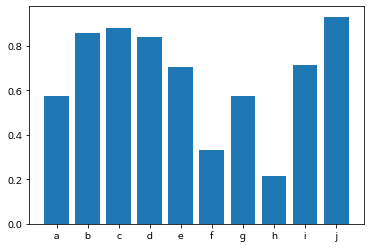

In [24]:
plt.bar(s2.index, s2.values)
plt.show()

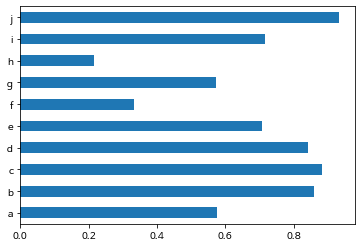

In [26]:
s2.plot(kind='barh')

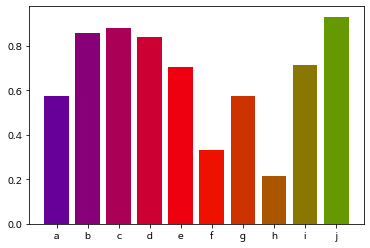

In [28]:
colors = plt.get_cmap('brg')(np.linspace(0.2, 0.8, 10))
plt.bar(s2.index, s2.values, color=colors)
plt.show()

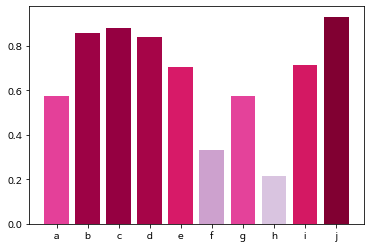

In [29]:
# 크기에 따라 색깔을 gradiation
colors = plt.get_cmap('PuRd')(s2.values)
plt.bar(s2.index, s2.values, color=colors)
plt.show()

### 4. Histogram

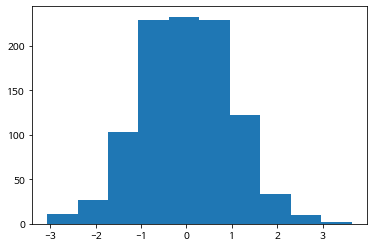

In [31]:
np.random.seed(2021)
s3 = pd.Series(np.random.randn(1000))
plt.hist(s3);

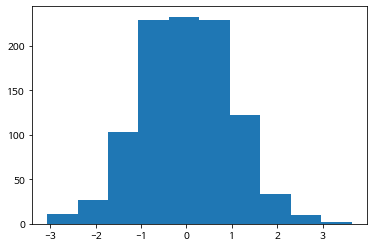

In [32]:
arrays, bins, _ = plt.hist(s3)
plt.show()

In [34]:
bins

array([-3.0663246 , -2.39581956, -1.72531451, -1.05480946, -0.38430442,
        0.28620063,  0.95670567,  1.62721072,  2.29771577,  2.96822081,
        3.63872586])

In [33]:
arrays

array([ 11.,  27., 103., 229., 233., 229., 122.,  34.,  10.,   2.])

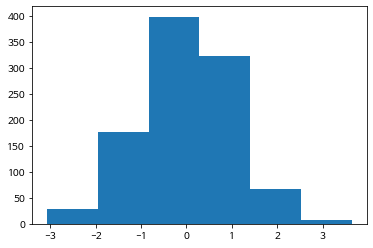

In [37]:
plt.hist(s3, bins=6);

### 5. Box Plot

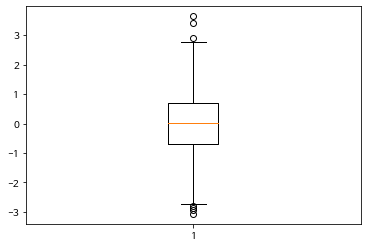

In [40]:
plt.boxplot(s3);

In [41]:
import seaborn as sns
iris = sns.load_dataset('iris')
setosa = iris[iris.species == 'setosa']

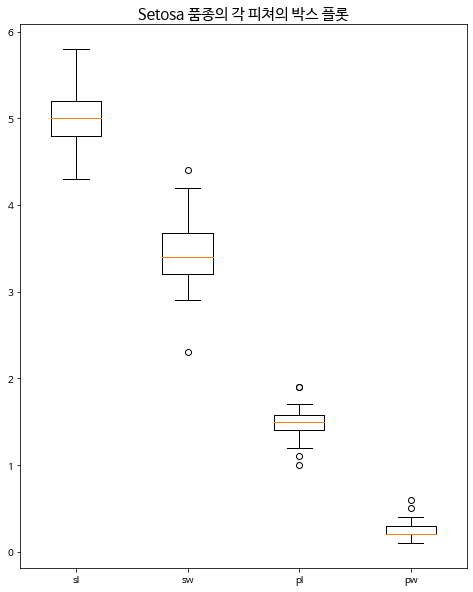

In [44]:
plt.figure(figsize=(8,10))
plt.boxplot([setosa.sepal_length, setosa.sepal_width,
             setosa.petal_length, setosa.petal_width],
            labels=['sl','sw','pl','pw'])
plt.title('Setosa 품종의 각 피쳐의 박스 플롯', fontsize=15)
plt.show()

### 6. 파이 차트

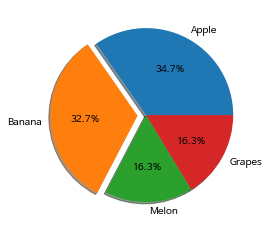

In [48]:
ratio = [34, 32, 16, 16]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = (0, 0.1, 0, 0)
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=explode, shadow=True)
plt.show()

### 7. 이미지

In [50]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 동물원.jpg to 동물원.jpg


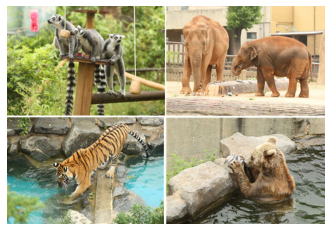

In [52]:
from PIL import Image
image = Image.open(filename)

plt.imshow(image)
plt.axis('off')
plt.show()

### 8. 제목, 레이블, 범례 작성

In [53]:
xs = np.linspace(0, 2*np.pi, 800)
ysin = np.sin(xs)
ycos = np.cos(xs)

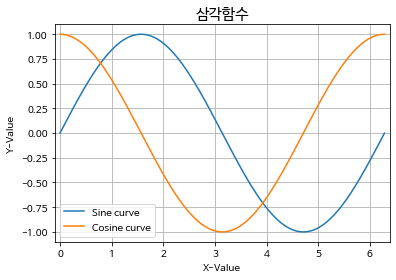

In [55]:
plt.plot(xs, ysin, label='Sine curve')
plt.plot(xs, ycos, label='Cosine curve')
plt.xlim([-0.1, 2*np.pi+0.1]); plt.ylim([-1.1, 1.1])
plt.xlabel('X-Value'); plt.ylabel('Y-Value')
plt.title('삼각함수', fontsize=15)
plt.legend()
plt.grid()
plt.show()

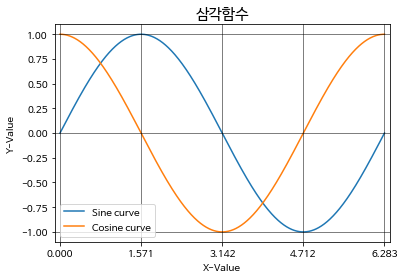

In [57]:
plt.plot(xs, ysin, label='Sine curve')
plt.plot(xs, ycos, label='Cosine curve')
plt.xlim([-0.1, 2*np.pi+0.1]); plt.ylim([-1.1, 1.1])
plt.xlabel('X-Value'); plt.ylabel('Y-Value')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
plt.title('삼각함수', fontsize=15)
plt.legend()

for y_val in [-1, 0, 1]:
    plt.axhline(y=y_val, color='k', linewidth=0.5)      # 수평선
for x_val in np.arange(0, 2*np.pi+0.01, np.pi/2):
    plt.axvline(x=x_val, c='k', lw=0.5)                 # 수직선

plt.savefig('삼각함수.png')

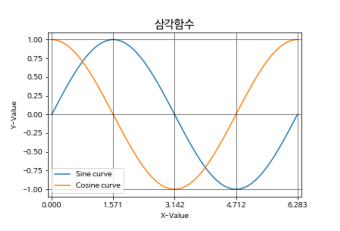

In [60]:
image = Image.open('삼각함수.png')
plt.imshow(image); plt.axis('off'); plt.show()